# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.242278e+01     8.097754e+00
 * time: 0.00174713134765625
     1     3.167382e+01     6.341999e+00
 * time: 0.0064601898193359375
     2     3.033592e+01     1.491814e+01
 * time: 0.01032400131225586
     3     1.410182e+01     4.323086e+00
 * time: 0.014556169509887695
     4     1.180094e+01     3.245719e+00
 * time: 0.018182039260864258
     5     1.120924e+01     2.034086e+00
 * time: 0.06920719146728516
     6     1.008141e+01     1.668888e+00
 * time: 0.07225799560546875
     7     9.238458e+00     1.655959e+00
 * time: 0.07519316673278809
     8     8.854765e+00     1.534508e+00
 * time: 0.07816600799560547
     9     8.676522e+00     1.191404e+00
 * time: 0.0810861587524414
    10     8.585989e+00     1.482024e+00
 * time: 0.08343315124511719
    11     8.439106e+00     1.017573e+00
 * time: 0.08632111549377441
    12     8.317826e+00     6.802867e-01
 * time: 0.08942604064941406
    13     8.242276e+00     1.186125e+00
 * ti

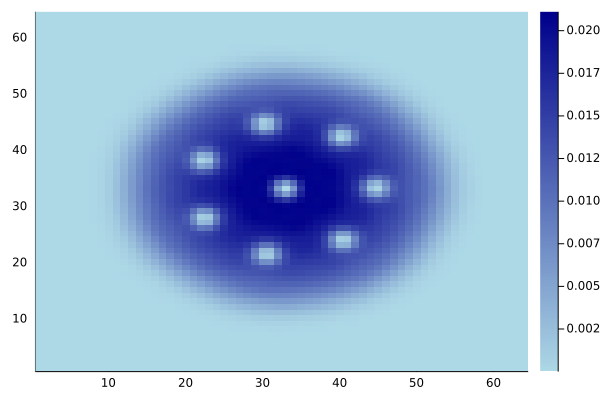

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)